In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [54]:
import sklearn
from sklearn.model_selection import train_test_split # divide dados de treino / teste
from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.linear_model import LinearRegression # Regressão linear
from sklearn.linear_model import Ridge # Regressão Ridge
from sklearn.linear_model import Lasso # Regressão Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score # Métricas para regressão
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from datetime import datetime as dt


#### IMPORTANDO O DF ALIMENTAÇÃO

In [68]:
df_alimentacao = pd.read_csv("../data/dados_para_processamento/df_alimentacao.csv", sep =',',
                              parse_dates = ['Data_Venda'],
                              index_col= 'Data_Venda', encoding = 'utf-8')
#df_alimentacao = df_alimentacao[df_alimentacao['Data_Venda'] != '2020-01']

In [69]:
df_alimentacao = df_alimentacao[df_alimentacao.index != '2020-01-01'].sort_index(ascending= True)

In [70]:
df_alimentacao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2019-01-01 to 2019-12-01
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Produto              48 non-null     object
 1   Quantidade_Comprada  48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [71]:
df_alimentacao.Produto.value_counts()

Produto
Cabo de Carregamento Turbo    12
Pilhas AA (4 Unidades)        12
Pilhas AAA (4 Unidades)       12
Cabo de Carregamento USB-C    12
Name: count, dtype: int64

<Axes: xlabel='Data_Venda'>

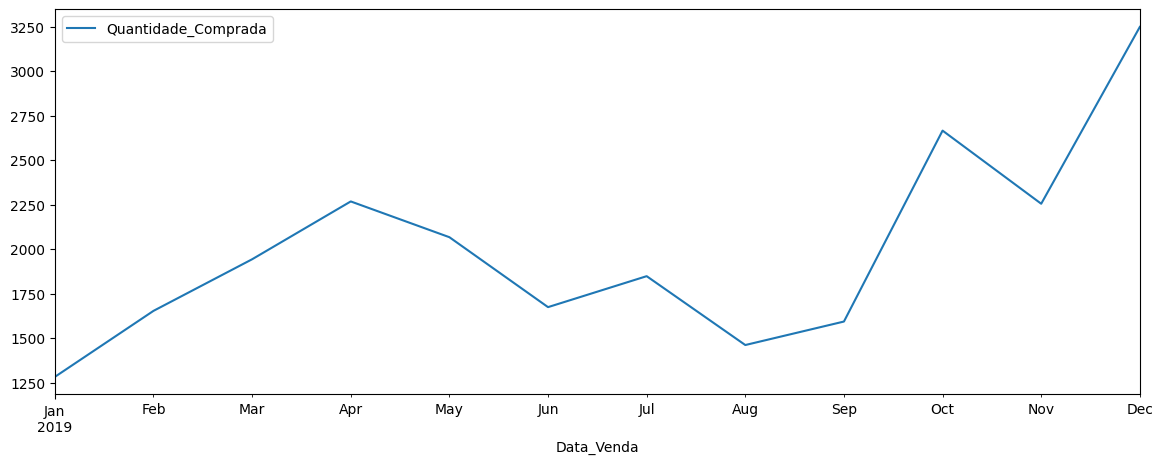

In [59]:
df_alimentacao[df_alimentacao['Produto'] == 'Cabo de Carregamento USB-C'].plot(figsize=(14,5))

In [60]:
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [77]:
for n in df_alimentacao.Produto.unique():
 print(n)

Cabo de Carregamento Turbo
Pilhas AA (4 Unidades)
Pilhas AAA (4 Unidades)
Cabo de Carregamento USB-C
